<a href="https://colab.research.google.com/github/KimJisanER/LAIDD/blob/main/AlphaFold_draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
colab_plddt =[]
b =1

In [3]:
with open('/content/selected_prediction.pdb', 'r') as file:
  for line in file:
          if line.startswith('ATOM'):
            number = int(line[22:26])
            if number == b:
              b+=1
              score = line[61:66].strip()
              colab_plddt.append(float(score))
            elif number == 1 and b > 2:
              b=1
              b+=1
              score = line[61:66].strip()
              colab_plddt.append(float(score))

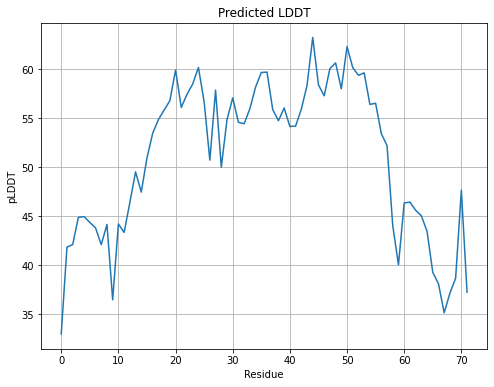

In [4]:
plt.figure(figsize=[8, 6])
plt.plot(colab_plddt,linestyle='solid')
plt.grid('True')
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')
plt.savefig('/content/pLDDT.png', dpi=300)

In [ ]:
#colab AlphaFold latest version result file

In [5]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
with open('/content/predicted_aligned_error.json', 'r') as pae:
  info = json.load(pae)
  pae = info[0]['predicted_aligned_error']
  max_pae = info[0]['max_predicted_aligned_error']

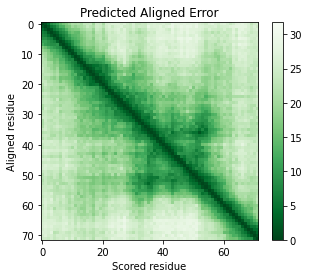

In [7]:
plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Predicted Aligned Error')
plt.xlabel('Scored residue')
plt.ylabel('Aligned residue')
plt.savefig('/content/PAE.png', dpi = 300)

In [ ]:
#colab AlphaFold old version result file

In [8]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
with open('/content/old_predicted_aligned_error.json', 'r') as pae:
  info = json.load(pae)
  residue1 = info[0]['residue1']
  residue2 = info[0]['residue2']
  pae_score = info[0]['distance']

In [10]:
pae_array = np.ones((max(residue1),(max(residue2))))

In [11]:
for x, y, z in zip(residue1, residue2, pae_score):
  pae_array[int(x-1),int(y-1)] = z

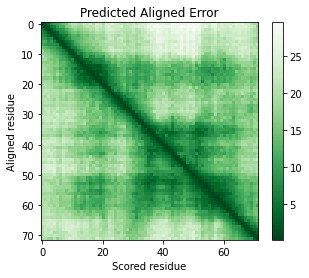

In [12]:
plt.subplot(1, 1, 1)
plt.imshow(pae_array, alpha=1, cmap='Greens_r')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Predicted Aligned Error')
plt.xlabel('Scored residue')
plt.ylabel('Aligned residue')
plt.savefig('/content/PAE.png', dpi = 300)

In [ ]:
#compare pLDDT

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#1.Wuhan-hu-1의 pLDDT 값 추출

In [15]:
wild_plddt =[]
b =1

In [16]:
with open('/content/wild.pdb', 'r') as file:
  for line in file:
          if line.startswith('ATOM'):
            number = int(line[22:26])
            if number == b:
              b+=1
              score = line[61:66].strip()
              wild_plddt.append(float(score))
            elif number == 1 and b > 2:
              b=1
              b+=1
              score = line[61:66].strip()
              wild_plddt.append(float(score))

In [ ]:
#2.delta의 pLDDT 값 추출

In [17]:
mutated_plddt =[]
b =1

In [18]:
with open('/content/mutated.pdb', 'r') as file:
  for line in file:
          if line.startswith('ATOM'):
            number = int(line[22:26])
            if number == b:
              b+=1
              score = line[61:66].strip()
              mutated_plddt.append(float(score))
            elif number == 1 and b > 2:
              b=1
              b+=1
              score = line[61:66].strip()
              mutated_plddt.append(float(score))

In [ ]:
#3. 비교 그래프 그리기

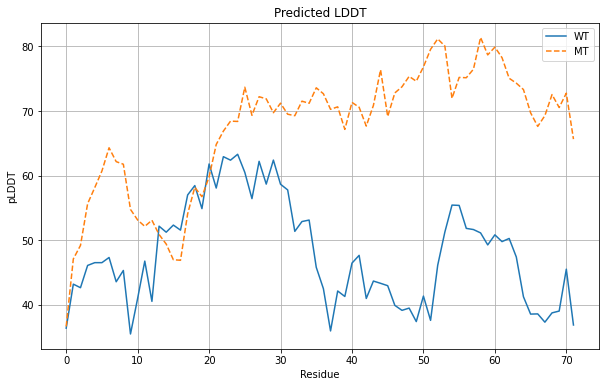

In [19]:
plt.figure(figsize=[10, 6])
plt.plot(wild_plddt,linestyle='solid',label='WT')
plt.plot(mutated_plddt,linestyle='dashed',label='MT')
plt.legend()
plt.grid('True')
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')
plt.savefig('/content/compare_plddt.png', dpi=300)